# Pytorch Workflow

* Getting data ready
* Generate a dataset
* Building the model
* Fit the trained data in the model
* Make predictions
* Save the model

In [24]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

## Getting data

In [25]:
# Parameters for the model
weight = 0.7
bias = 0.3

# Independent feature
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)  # 2 dimensions

# Targer label
y = ((weight * X) + bias).squeeze()  # 1 dim

In [26]:
print(X)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


In [27]:
print(y, len(y))

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
        0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
        0.9300, 0.9440, 0.9580, 0.9720, 0.9860]) 50


In [28]:
# Increase dimensions for X because trainig will require the dimension for X to be at least 2 dimensions

# X.reshape((1, 50)).ndim
# X.unsqueeze(dim=0)

## Split data into train and test data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [30]:
len(X_train)

40

In [31]:
len(X_test)

10

In [32]:
def plot_prediction(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    prediction=None):
  '''Plot trainig data, test data and compare predictions'''
  plt.figure(figsize=(10, 7))

  # Plot train data
  plt.scatter(train_data, train_label, c='blue', label='Training data')

  # Plot test data
  plt.scatter(test_data, test_label, c='green', label='Test data')

  if prediction is not None:
    plt.scatter(test_data, prediction, c='red', label='Prediction')

  plt.legend(prop={"size": 14})
  plt.show()


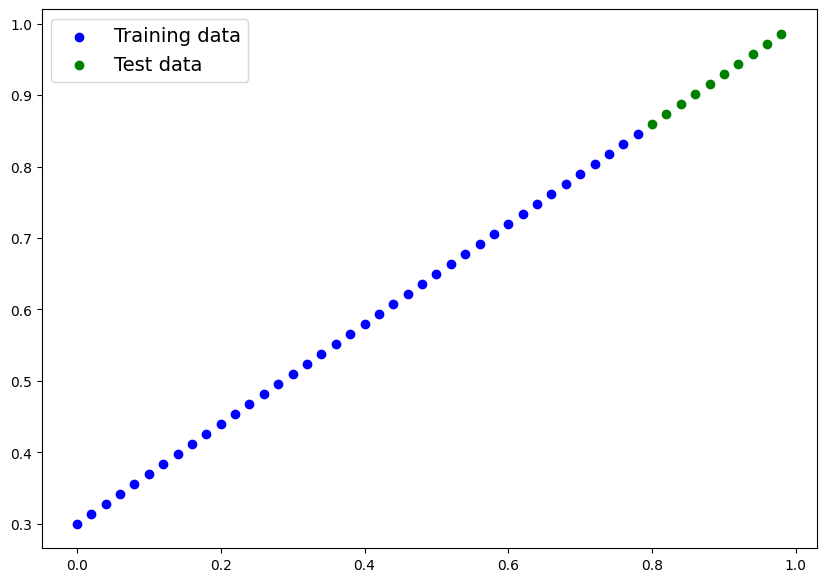

In [33]:
plot_prediction()

## Building a Deep learning model: Linear Regression model

In [34]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
  '''Model that utilizes linear regression as a base model'''

  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, X: torch.tensor) -> torch.tensor:
    return (self.weight * X) + self.bias

In [35]:
torch.manual_seed(42)
# create object
lreg_model = LinearRegressionModel()

In [36]:
lreg_model.weight

Parameter containing:
tensor([0.3367], requires_grad=True)

In [37]:
lreg_model.bias

Parameter containing:
tensor([0.1288], requires_grad=True)

## Train model

In [38]:
with torch.inference_mode():
  y_pred = lreg_model(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

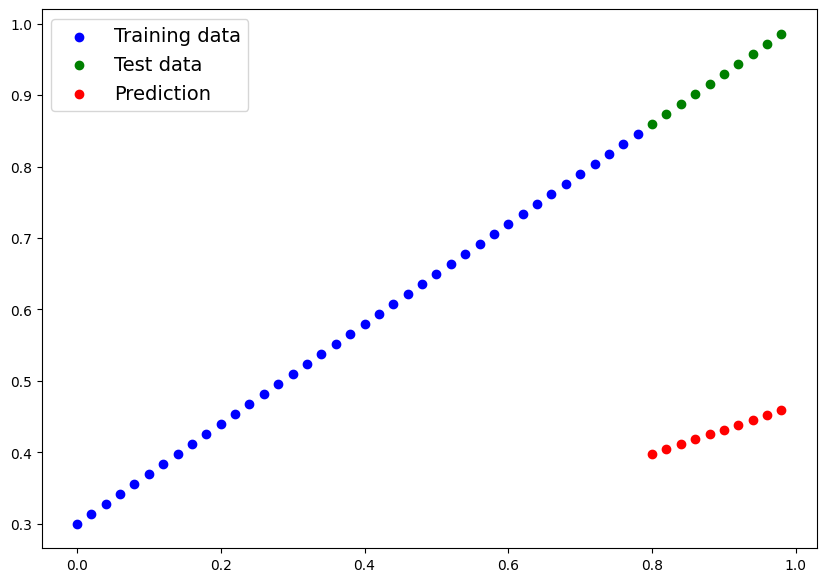

In [39]:
plot_prediction(prediction=y_pred)

In [40]:
loss = y_test - y_pred
loss

tensor([[0.4618, 0.4758, 0.4898, 0.5038, 0.5178, 0.5318, 0.5458, 0.5598, 0.5738,
         0.5878],
        [0.4551, 0.4691, 0.4831, 0.4971, 0.5111, 0.5251, 0.5391, 0.5531, 0.5671,
         0.5811],
        [0.4484, 0.4624, 0.4764, 0.4904, 0.5044, 0.5184, 0.5324, 0.5464, 0.5604,
         0.5744],
        [0.4416, 0.4556, 0.4696, 0.4836, 0.4976, 0.5116, 0.5256, 0.5396, 0.5536,
         0.5676],
        [0.4349, 0.4489, 0.4629, 0.4769, 0.4909, 0.5049, 0.5189, 0.5329, 0.5469,
         0.5609],
        [0.4282, 0.4422, 0.4562, 0.4702, 0.4842, 0.4982, 0.5122, 0.5262, 0.5402,
         0.5542],
        [0.4214, 0.4354, 0.4494, 0.4634, 0.4774, 0.4914, 0.5054, 0.5194, 0.5334,
         0.5474],
        [0.4147, 0.4287, 0.4427, 0.4567, 0.4707, 0.4847, 0.4987, 0.5127, 0.5267,
         0.5407],
        [0.4080, 0.4220, 0.4360, 0.4500, 0.4640, 0.4780, 0.4920, 0.5060, 0.5200,
         0.5340],
        [0.4012, 0.4152, 0.4292, 0.4432, 0.4572, 0.4712, 0.4852, 0.4992, 0.5132,
         0.5272]])

## Loss Function and Optimization

In [41]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=lreg_model.parameters(), lr=0.01)

## Build training loop

In [42]:
torch.manual_seed(42)

# set the number of loops (epoch)
epochs = 100

# create an empty loss list to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  # put the model in the training mode
  lreg_model.train()

  # Forward propagation
  y_pred = lreg_model(X_train)

  # Calulate loss
  loss = loss_fn(y_pred, y_test)

  # Optimize the model
  optimizer.zero_grad()

  # Backward propagation
  loss.backward()

  # Progress the optimizer
  optimizer.step()

  # Testing the model in evaluation mode
  lreg_model.eval()

  with torch.inference_mode():
    # Forward propagation on test data
    test_pred = lreg_model(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    # Print out result
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())

      print(f'Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}')

Epoch: 0 | MAE Train Loss: 0.6628813743591309 | MAE Test Loss: 0.48106515407562256
Epoch: 10 | MAE Train Loss: 0.547671377658844 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.4324614405632019 | MAE Test Loss: 0.21164533495903015
Epoch: 30 | MAE Train Loss: 0.3172515630722046 | MAE Test Loss: 0.07836812734603882
Epoch: 40 | MAE Train Loss: 0.20473439991474152 | MAE Test Loss: 0.06141294538974762
Epoch: 50 | MAE Train Loss: 0.14029106497764587 | MAE Test Loss: 0.14655113220214844
Epoch: 60 | MAE Train Loss: 0.11949514597654343 | MAE Test Loss: 0.19101926684379578
Epoch: 70 | MAE Train Loss: 0.11111047863960266 | MAE Test Loss: 0.21145425736904144
Epoch: 80 | MAE Train Loss: 0.10633546113967896 | MAE Test Loss: 0.21933342516422272
Epoch: 90 | MAE Train Loss: 0.10267164558172226 | MAE Test Loss: 0.2203768789768219


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


## Plot loss curve

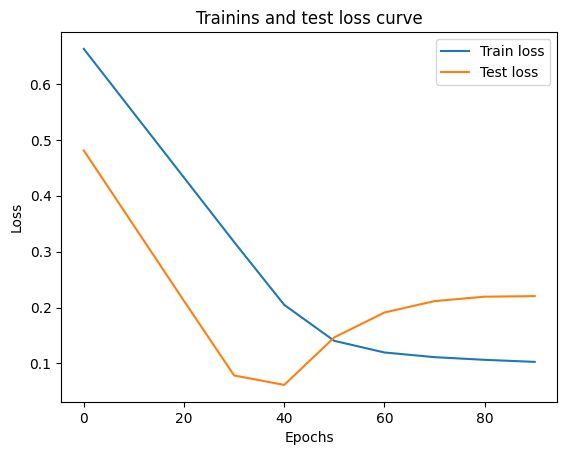

In [43]:
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Trainins and test loss curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## Find model best learning parameter

In [44]:
lreg_model.state_dict()

OrderedDict([('weight', tensor([0.4714])), ('bias', tensor([0.7214]))])

In [45]:
lreg_model.eval()

with torch.inference_mode():
  y_pred = lreg_model(X_test)

y_pred

tensor([[1.0985],
        [1.1079],
        [1.1174],
        [1.1268],
        [1.1362],
        [1.1456],
        [1.1551],
        [1.1645],
        [1.1739],
        [1.1833]])

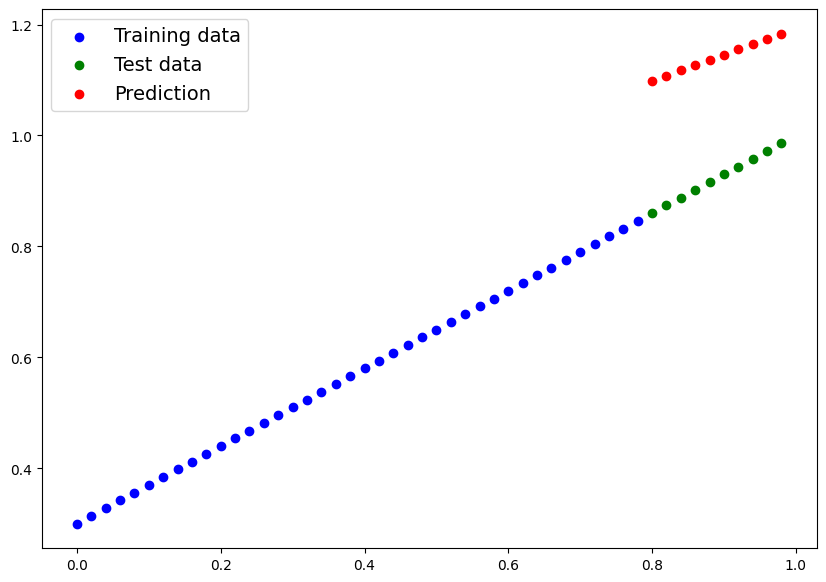

In [46]:
plot_prediction(prediction=y_pred)

## Save model

In [47]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'my_first_deep_learning_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Sabing model to {MODEL_SAVE_PATH}')
torch.save(obj=lreg_model.state_dict(), f=MODEL_SAVE_PATH)

Sabing model to models/my_first_deep_learning_model.pth
